In [196]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

np.random.seed(42)

lb = -5
ub = 5
dim = 2
n = 2
centroids = np.random.uniform(lb, ub, (n, dim))
svm = SVC(kernel="linear").fit(centroids, range(n))

w = svm.coef_[0]
b = svm.intercept_[0]
h = lambda x: ((np.dot(np.atleast_2d(x).T, np.atleast_2d(w[:-1])) + b) / -w[-1]).T

def intersect(v1, v2, c1, c2):
    x, err, rank, *_ = np.linalg.lstsq(np.array([v1, -v2]).T, c2-c1, rcond=None)
    if rank == 2:
        t, s = x
        i1 = (c1 + (v1 * t))
        i2 = (c2 + (v2 * s))
        assert np.allclose(i1, i2)
        return i1

def intersect_p(a1, a2, b1, b2):
    return intersect(a2 - a1, b2 - b1, a1, b1)

    
p = np.random.uniform(ub, lb, (1, dim))

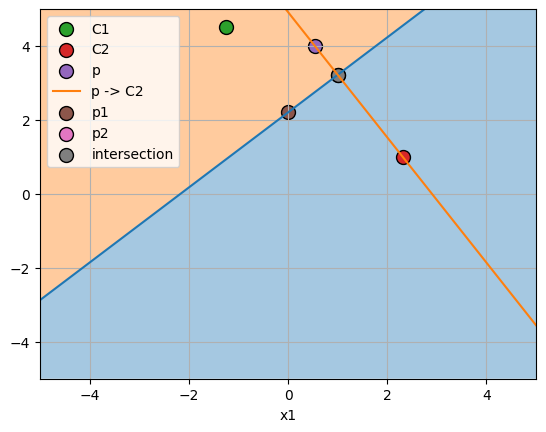

In [197]:
ax = plt.figure().add_subplot()
x = np.linspace(lb, ub)
y = 1
boundary = h(x)[y-1]
ax.plot(x, boundary)
ax.fill_between(x, np.ones(len(x))*-5, boundary, alpha=.4)
ax.fill_between(x, np.ones(len(x))*5, boundary, alpha=.4)

for i, c in enumerate(centroids):
    ax.scatter(c[0], c[y],  label=f"C{i+1}", edgecolors='black', s=100)

target, *_ = svm.predict(p)
ci = abs(target - 1)
ax.scatter(p[:, 0], p[:, y], label="p", edgecolors='black',  s=100)

c = centroids[ci]
direction = p - c
theta = (p.T + x * direction.T)
ax.plot(theta[0], theta[y], label=f"p -> C{ci+1}")

t1, t2 = 0, 1
p1 = np.r_[t1, h(t1).ravel()]
p2 = np.r_[t2, h(t2).ravel()]

ax.scatter(p1[0], p1[y], label="p1", edgecolors='black', s=100)
ax.scatter(p2[0], p2[y], label="p2", edgecolors='black', s=100)

isc = intersect_p(p1, p2, p.ravel(), c.ravel())
ax.scatter(isc[0], isc[y], label="intersection", edgecolors='black', s=100)

ax.legend()
ax.grid()
ax.set_xlabel(f"x{x}")
ax.set_xlabel(f"x{y}")
ax.set_xlim(lb, ub)
ax.set_ylim(lb, ub);
